## Linear Regression - Practical Implementation

- Import Required libraries
- We start with loading a boston data

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [23]:
data = fetch_california_housing()

In [26]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [24]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)

In [25]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [28]:
df['Target'] = data.target

In [44]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [45]:
df.drop(columns=['Target'], inplace=True)

In [75]:
X=df
y=data.target

In [77]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [48]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


## train_test_split

In [49]:
from sklearn.model_selection import train_test_split

In [78]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
X_train.shape, X_test.shape

((14448, 8), (6192, 8))

## Standardisation

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [57]:
X_train = scaler.fit_transform(X_train)

In [58]:
from sklearn.linear_model import LinearRegression


## Cross Validation

In [59]:
from sklearn.model_selection import cross_val_score

In [79]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [80]:
mse = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

In [81]:
np.mean(mse)

-0.5268253746355759

## Prediction

In [82]:
reg_predict = regression.predict(X_test)

In [83]:
reg_predict

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

In [84]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14448 entries, 7061 to 15795
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      14448 non-null  float64
 1   HouseAge    14448 non-null  float64
 2   AveRooms    14448 non-null  float64
 3   AveBedrms   14448 non-null  float64
 4   Population  14448 non-null  float64
 5   AveOccup    14448 non-null  float64
 6   Latitude    14448 non-null  float64
 7   Longitude   14448 non-null  float64
dtypes: float64(8)
memory usage: 1015.9 KB


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

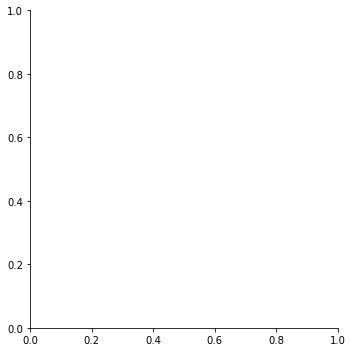

In [87]:
import seaborn as sns
sns.displot(reg_predict-y_test, kind='kde')

In [88]:
from sklearn.metrics import r2_score
score = r2_score(reg_predict,y_test)
score

0.3451339380943974